<a href="https://colab.research.google.com/github/dinachoir/Forest-Fires/blob/main/Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fires Binary Classification

## Problem Statement
Forest fires help in the natural cycle of woods' growth and replenishment. They Clear dead trees, leaves, and competing vegetation from the forest floor, so new plants can grow. Remove weak or disease-ridden trees, leaving more space and nutrients for stronger trees.

But when fires burn too hot and uncontrollable or when they’re in the “wildland-urban interface” (the places where woodlands and homes or other developed areas meet), they can be damaging and life threatning.

This project aims **to predict the occurance of forest fires** in the northeast region of Portugal based on the spatial, temporal, and weather variables where the fire is previously occured.

This prediction can be used for detecting and preventing the occurance of forest fires early before it can be happened.

## Attribute Information:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20. FFMC index is the dryness of the smallest forest fuels (surface litter, leaves, needles, small twigs, etc). FFMC is a numeric rating of the moisture content of litter and other cured fine fuels.
6. DMC - DMC index from the FWI system: 1.1 to 291.3. The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter.
7. DC - DC index from the FWI system: 7.9 to 860.6. The Drought Code (DC) represents drying deep into the soil.
8. ISI - ISI index from the FWI system: 0.0 to 56.10. The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread.
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [ ]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# load data
clf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
clf.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# change column names
clf.rename(columns = {'X':'x_axis_coordinate', 'Y':'y_axis_coordinate'}, inplace = True)

In [ ]:
# create new column named 'forest_fire' as target label
# Value 0 : No forest fire
# Value 1 : There's a forest fire
# The occurance of forest fires based on the data of 'area' column
# If there's burned area of the forest, then there's a forest fire there

clf.loc[(clf['area'] == 0, 'forest_fire')] = 0
clf.loc[(clf['area'] > 0, 'forest_fire')] = 1

In [ ]:
clf.shape

(517, 14)

In [ ]:
clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   x_axis_coordinate  517 non-null    int64  
 1   y_axis_coordinate  517 non-null    int64  
 2   month              517 non-null    object 
 3   day                517 non-null    object 
 4   FFMC               517 non-null    float64
 5   DMC                517 non-null    float64
 6   DC                 517 non-null    float64
 7   ISI                517 non-null    float64
 8   temp               517 non-null    float64
 9   RH                 517 non-null    int64  
 10  wind               517 non-null    float64
 11  rain               517 non-null    float64
 12  area               517 non-null    float64
 13  forest_fire        517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


In [ ]:
clf.describe()

,x_axis_coordinate,y_axis_coordinate,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,forest_fire
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.522244
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.499989
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [ ]:
# check missing value
clf.isnull().sum()

x_axis_coordinate    0
y_axis_coordinate    0
month                0
day                  0
FFMC                 0
DMC                  0
DC                   0
ISI                  0
temp                 0
RH                   0
wind                 0
rain                 0
area                 0
forest_fire          0
dtype: int64

In [ ]:
# check duplicates
duplicate = clf[clf.duplicated()]
print(duplicate)

     x_axis_coordinate  y_axis_coordinate month  day  FFMC    DMC     DC  \
53                   4                  3   aug  wed  92.1  111.2  654.1   
100                  3                  4   aug  sun  91.4  142.4  601.4   
215                  4                  4   mar  sat  91.7   35.8   80.8   
303                  3                  6   jun  fri  91.1   94.1  232.1   

      ISI  temp  RH  wind  rain   area  forest_fire  
53    9.6  20.4  42   4.9   0.0   0.00          0.0  
100  10.6  19.8  39   5.4   0.0   0.00          0.0  
215   7.8  17.0  27   4.9   0.0  28.66          1.0  
303   7.1  19.2  38   4.5   0.0   0.00          0.0  


## **Data Exploration**

In [ ]:
clf['forest_fire'].value_counts()

1.0    270
0.0    247
Name: forest_fire, dtype: int64

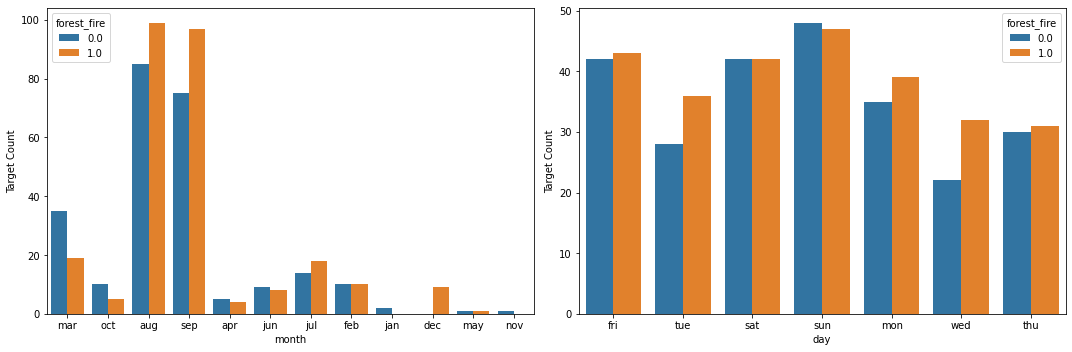

In [ ]:
# Countplot categorical columns

categorical_cols = clf[['month','day']]
fig, ax = plt.subplots(1,2, figsize=(15,5))

for i, col in enumerate(categorical_cols,1):
  plt.subplot(1,2,i)
  sns.countplot(x=col, data=clf, hue='forest_fire') # , hue='forest_fire'

  plt.xlabel('{}'.format(col))
  plt.ylabel('Target Count')

plt.tight_layout()
plt.show()

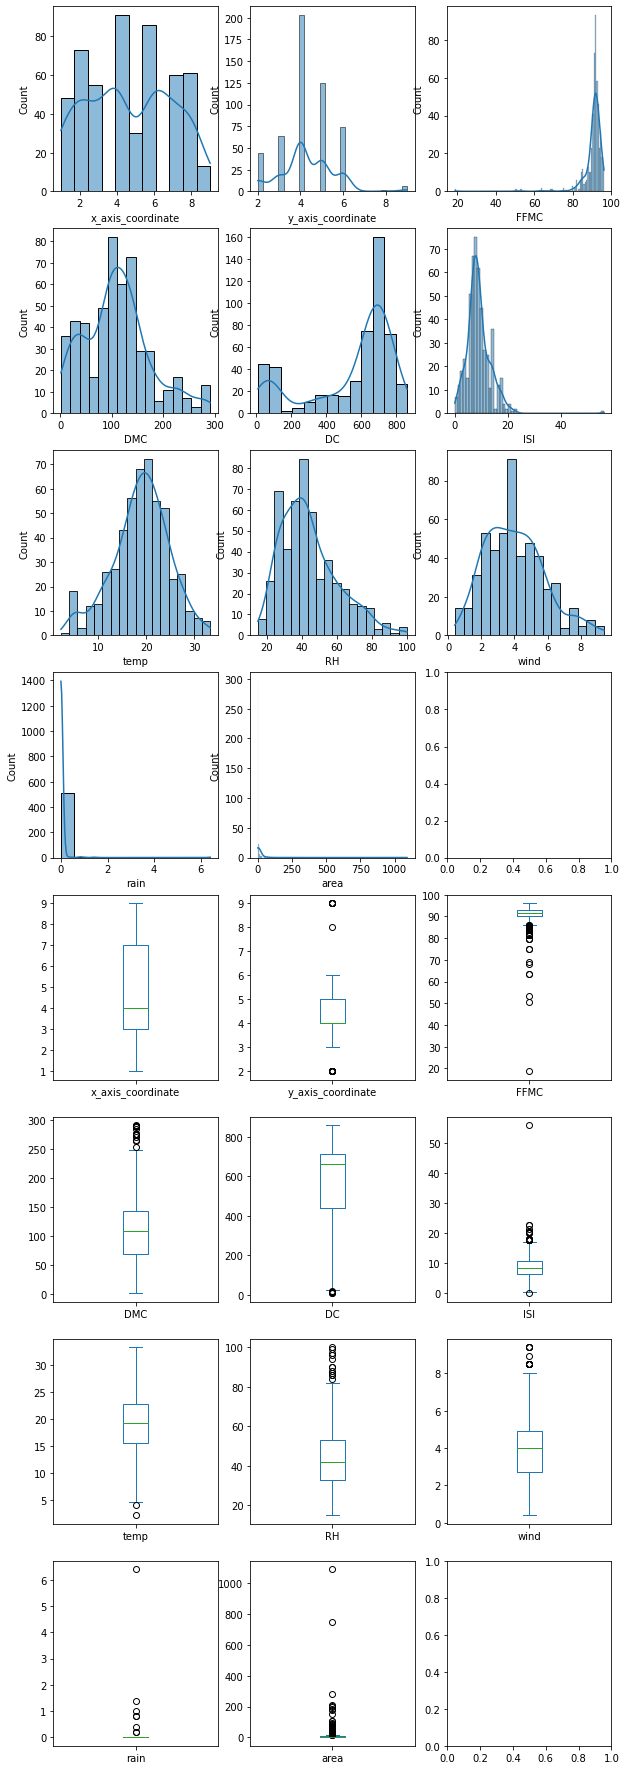

In [ ]:
# plot the distribution of numerical features

numerical_cols = clf[['x_axis_coordinate','y_axis_coordinate','FFMC',	'DMC', 'DC', 'ISI', 'temp',	'RH',	'wind',	'rain',	'area']]
fig, ax = plt.subplots(8, 3, figsize=(10,32))

for i, col in enumerate(numerical_cols,1):
    plt.subplot(8,3,i)
    sns.histplot(data=clf, x=col, kde=True)
    plt.subplot(8,3,i+12)
    clf[col].plot.box()
plt.show()

1. Most of the data skewed because there are outliers present in the right and left side of distribution.
2. However, the outliers are not error values so we cannot remove it.
3. In order to minimize the effect of outliers in model, we will transform the data to logarithmic form

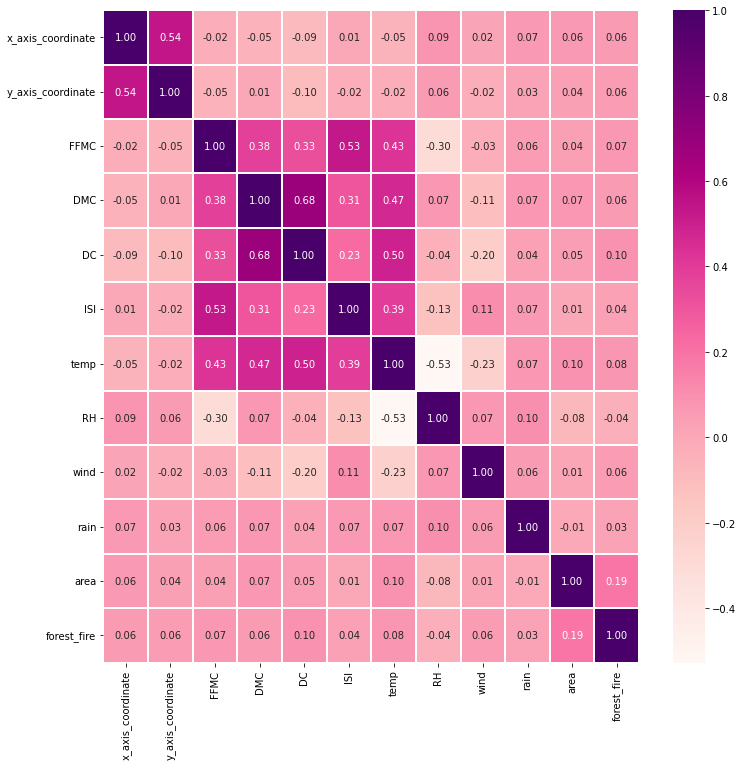

In [ ]:
# visualize correlations
plt.figure(figsize=(12,12))
sns.heatmap(data=clf.corr(), annot=True, cmap='RdPu', fmt='.2f', linewidth=1)
plt.show()

In [ ]:
# sort the highest correlated features to the target variable
feature_corr = abs(clf.corr()['forest_fire']).sort_values(ascending=False)
feature_corr

forest_fire          1.000000
area                 0.193224
DC                   0.096724
temp                 0.076047
FFMC                 0.073823
DMC                  0.062672
x_axis_coordinate    0.062491
y_axis_coordinate    0.056892
wind                 0.055702
ISI                  0.035663
RH                   0.035587
rain                 0.025550
Name: forest_fire, dtype: float64

In [ ]:
# check correlation of features for binary classification
bc = clf.drop(['area'], axis=1)
bc.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,forest_fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
bc_corr = abs(bc.corr()['forest_fire']).sort_values(ascending=False)
bc_corr

forest_fire    1.000000
DC             0.096724
temp           0.076047
FFMC           0.073823
DMC            0.062672
X              0.062491
Y              0.056892
wind           0.055702
ISI            0.035663
RH             0.035587
rain           0.025550
Name: forest_fire, dtype: float64

In [ ]:
# check correlation of features for regression model
rm = clf.drop(['forest_fire'], axis=1)
rm.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
rm_corr = abs(rm.corr()['area']).sort_values(ascending=False)
rm_corr

area    1.000000
temp    0.097844
RH      0.075519
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain    0.007366
Name: area, dtype: float64

## **Data Preparation**

In [ ]:
clf = pd.get_dummies(clf, columns=['day','month'],drop_first=True)

In [ ]:
# splitting dataset

from sklearn.model_selection import train_test_split

X = clf.drop(['forest_fire','area'], axis = 1)
y = clf['forest_fire']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (413, 27) (413,)
Test set:    (104, 27) (104,)


In [ ]:
# Check the min and max values of the training data
X_train.min().min(), X_train.max().max()

(0.0, 860.6)

In [ ]:
# scaling data
X_train = X_train/860.6
X_test = X_test/860.6

# Check the min and max values of the training data
X_train.min().min(), X_train.max().max()

(0.0, 1.0)

## **Modeling**

**Model 1 : Layer Experiment**

In [ ]:
def fit_model_layer1(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, input_dim=27,activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=epoch, batch_size=32, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend(loc='lower right')

In [ ]:
def fit_model_layer2(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, input_dim=27,activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=epoch, batch_size=32, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend(loc='lower right')

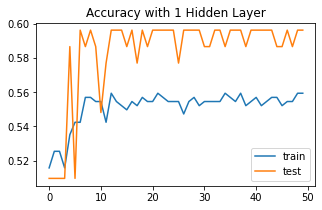

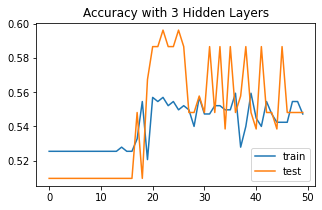

In [ ]:
# plot accuracy (normalized data)

## fit_model_layer1
plt.figure(figsize=(5,3))
fit_model_layer1(X_train, y_train, X_test, y_test, epoch = 50)
plt.title('Accuracy with 1 Hidden Layer')
plt.show()

## fit_model_layer2
plt.figure(figsize=(5,3))
fit_model_layer2(X_train, y_train, X_test, y_test, epoch = 50)
plt.title('Accuracy with 3 Hidden Layers')
plt.show()

**Findings:**
1. Learning process model with 1 hidden layer is more faster than  model with 3 hidden layers. The first model hits the highest accuracy in less than 10 epochs, while the second one in around 20 epochs.
2. The accuracy model with 3 hidden layers is more volatile, even though training accuracy and testing accuracy tend to converge.
3. The testing accuracy is higher than the training accuracy probably due to random seed = 42 gives testing set consists of "easier" examples than the training set.
4. However both accuracy are poor. It is like a litte bit better than guessing.

**Model 2 : Neuron Experiment**

In [ ]:
def fit_model_neuron1(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=27,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=epoch, batch_size=32, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend(loc='lower right')

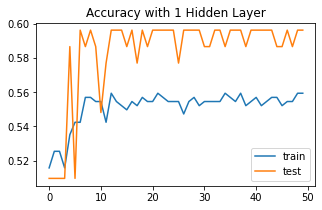

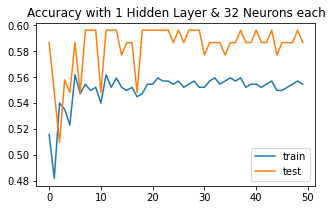

In [ ]:
# plot accuracy (normalized data)

## fit_model_layer1
plt.figure(figsize=(5,3))
fit_model_layer1(X_train, y_train, X_test, y_test, epoch = 50)
plt.title('Accuracy with 1 Hidden Layer')
plt.show()

## fit_model_neuron1
plt.figure(figsize=(5,3))
fit_model_neuron1(X_train, y_train, X_test, y_test, epoch = 50)
plt.title('Accuracy with 1 Hidden Layer & 32 Neurons each')
plt.show()

In [ ]:
def fit_model_neuron2(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=27,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=epoch, batch_size=32, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend(loc='lower right')

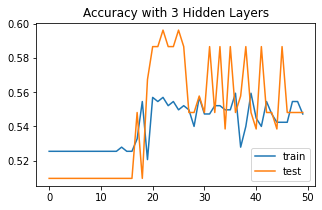

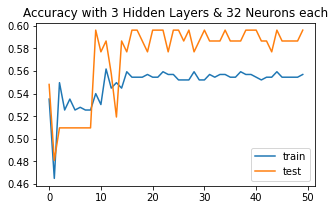

In [ ]:
# plot accuracy (normalized data)

## fit_model_layer1
plt.figure(figsize=(5,3))
fit_model_layer2(X_train, y_train, X_test, y_test, epoch = 50)
plt.title('Accuracy with 3 Hidden Layers')
plt.show()

## fit_model_neuron1
plt.figure(figsize=(5,3))
fit_model_neuron2(X_train, y_train, X_test, y_test, epoch = 50)
plt.title('Accuracy with 3 Hidden Layers & 32 Neurons each')
plt.show()

**Model 3 : Epoch Experiment**

In [ ]:
epochz=[9, 25, 50, 100, 150, 200]

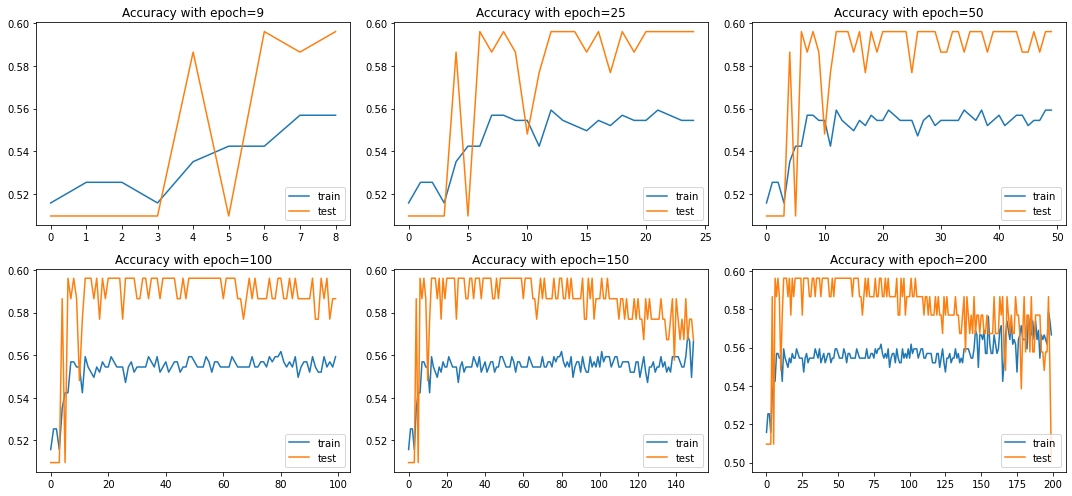

In [ ]:
# with fit_model_layer1 with different epoch

plt.figure(figsize=(15,7))
for i in range(len(epochz)):
    plt.subplot(2,3,i+1)
    # fit model and plot learning curves
    fit_model_layer1(X_train, y_train, X_test, y_test, epochz[i])
    plt.title('Accuracy with epoch='+str(epochz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. Model with 1 hidden layer and 4 neurons seems optimum in around epoch 150-200, where the accuracy between training and testing start to converge.
2. At epoch 200, accuracy model drops in around 51%.

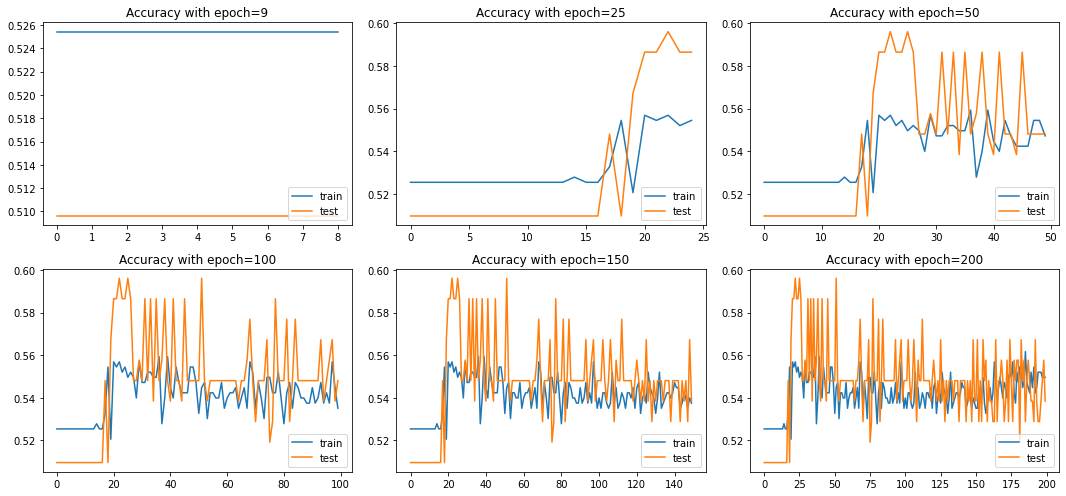

In [ ]:
# fit_model_layer2 with different epoch

plt.figure(figsize=(15,7))
for i in range(len(epochz)):
    plt.subplot(2,3,i+1)
    # fit model and plot learning curves
    fit_model_layer2(X_train, y_train, X_test, y_test, epochz[i])
    plt.title('Accuracy with epoch='+str(epochz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. Model with 3 hidden layer and 4 neurons seems optimum in around epoch 200, where the accuracy between training and testing start to converge and hits higher than before.
2. Meanwhile adding more layers in the same number of neurons results accuracy plot a lot more volatile.

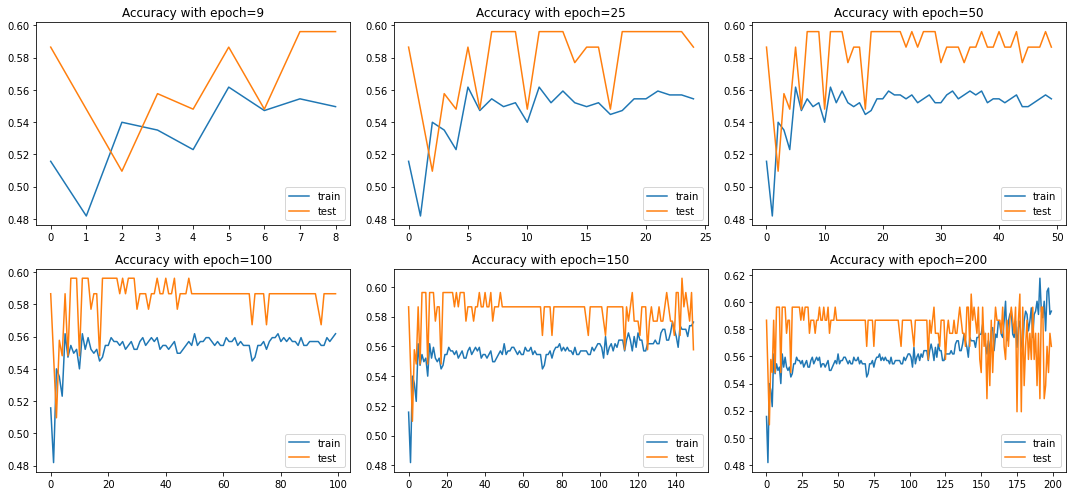

In [ ]:
# fit_model_neuron1 with different epoch

plt.figure(figsize=(15,7))
for i in range(len(epochz)):
    plt.subplot(2,3,i+1)
    # fit model and plot learning curves
    fit_model_neuron1(X_train, y_train, X_test, y_test, epochz[i])
    plt.title('Accuracy with epoch='+str(epochz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. Model with 1 hidden layer and 32 neurons seems optimum in around epoch 150, where the accuracy between training and testing start to converge.
2. the last plot shows training accuracy is going higher, while testing accuracy is going lower.
3. Adding more neurons results accuracy plot less volatile.
4. This accuracy is the best accuracy so far.

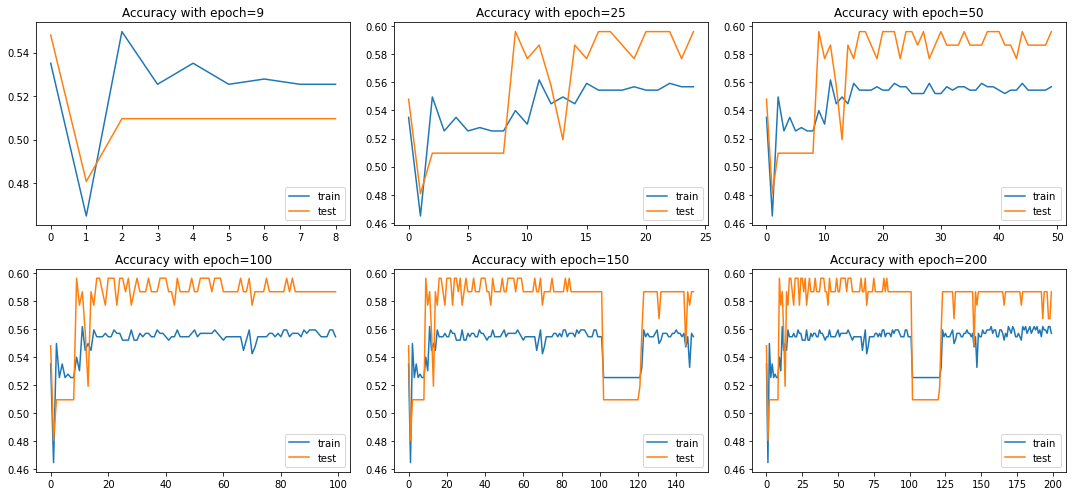

In [ ]:
# fit_model_neuron2 with different epoch

plt.figure(figsize=(15,7))
for i in range(len(epochz)):
    plt.subplot(2,3,i+1)
    # fit model and plot learning curves
    fit_model_neuron2(X_train, y_train, X_test, y_test, epochz[i])
    plt.title('Accuracy with epoch='+str(epochz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. Adding more epochs to model with 3 hidden layers and 32 neurons results no good.

**Model 4 : Batch Size Experiment**

In [ ]:
def fit_model_neuron1_bs(x_train, y_train, x_test, y_test, batch_size):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=27,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=200, batch_size=batch_size, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend(loc='lower right')

In [ ]:
batchz = [32, 64, 128, 256, 512]

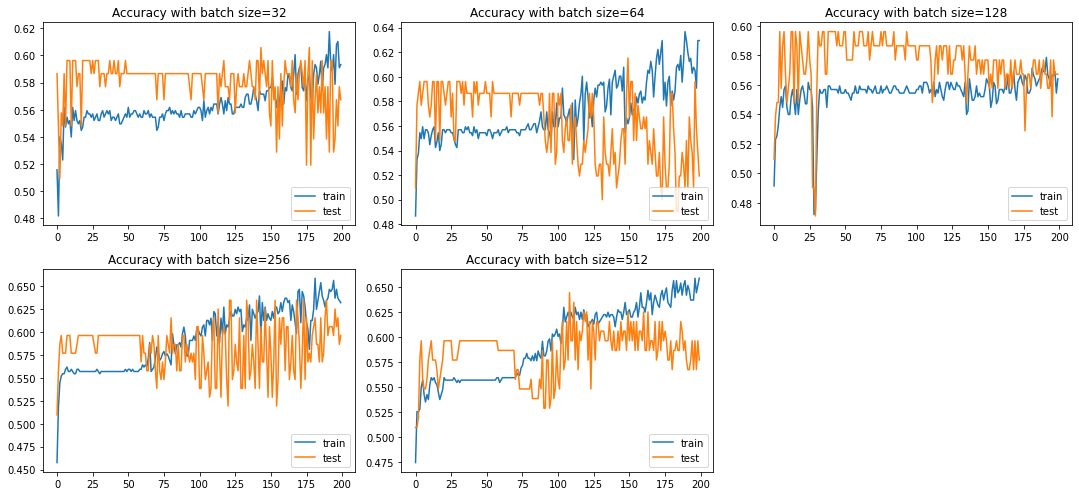

In [ ]:
# fit_model_neuron1 with epoch = 200 and different batch size

plt.figure(figsize=(15,7))
for i in range(len(batchz)):
    plt.subplot(2,3,i+1)
    # fit model and plot learning curves
    fit_model_neuron1_bs(X_train, y_train, X_test, y_test, batchz[i])
    plt.title('Accuracy with batch size='+str(batchz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. Model with 1 hidden layer, 32 neurons, 200 epoch, and batch size 256 gives the best result in accuracy.
2. Enlarge batch size tends to make model overfitting.

**Model 5 : Learning Rate Experiment**

In [ ]:
def fit_model_neuron1_bs_lr(x_train, y_train, x_test, y_test, lr):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=27,activation='relu'),
        tf.keras.layers.Dense(32, activation= 'relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=200, batch_size=256, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend(loc='lower right')

In [ ]:
learning_rt = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6]

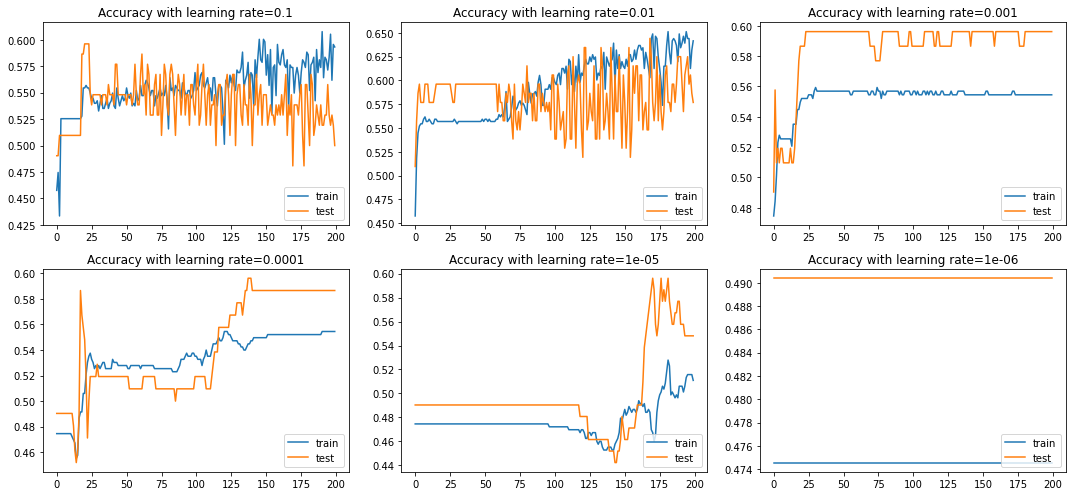

In [ ]:
# fit_model_neuron1 with epoch = 200, batch size = 256, and different learning rate

plt.figure(figsize=(15,7))
for i in range(len(learning_rt)):
    plt.subplot(2,3,i+1)
    # fit model and plot learning curves
    fit_model_neuron1_bs_lr(X_train, y_train, X_test, y_test, learning_rt[i])
    plt.title('Accuracy with learning rate='+str(learning_rt[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. The smaller learning rate, the model accuracy curves more diverge. It could happen because if the learning rate is too low, gradient descent will take more time to reach the optima.
2. The optimum learning rate for this case is 0.01

**Model 6 : Activation Function Experiment**

In [ ]:
def fit_model_neuron1_bs_lr_af(x_train, y_train, x_test, y_test, activation):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=27,activation=activation),
        tf.keras.layers.Dense(32, activation= activation),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=200, batch_size=256, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend(loc='lower right')

In [ ]:
activationz = ['relu','tanh','linear']

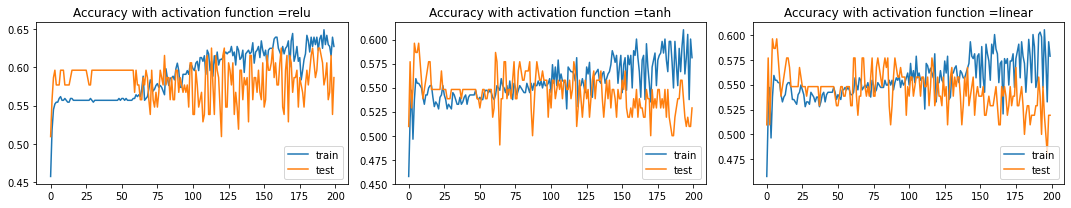

In [ ]:
# fit_model_neuron1 with epoch = 200, batch size = 256, learning rate = 0.01, and different activation functions

plt.figure(figsize=(15,3))
for i in range(len(activationz)):
    plt.subplot(1,3,i+1)
    # fit model and plot learning curves
    fit_model_neuron1_bs_lr_af(X_train, y_train, X_test, y_test, activationz[i])
    plt.title('Accuracy with activation function ='+ activationz[i])

plt.tight_layout()
plt.show()

**Findings:**
1. Relu activation function gives the best model performance.

**Model 7 : Optimizer Experiment**

In [ ]:
def fit_model_neuron1_bs_lr_af(x_train, y_train, x_test, y_test, optimizer):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=27,activation='relu'),
        tf.keras.layers.Dense(32, activation= 'relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=optimizer(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=200, batch_size=256, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend(loc='lower right')

In [ ]:
optimizerz =[tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.Adamax]

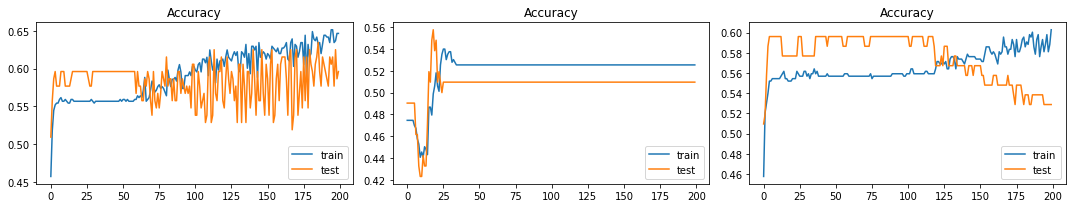

In [ ]:
# fit_model_neuron1 with epoch = 200, batch size = 256, learning rate = 0.01, activation function = relu, and different optimizers

plt.figure(figsize=(15,3))
for i in range(len(optimizerz)):
    plt.subplot(1,3,i+1)
    # fit model and plot learning curves
    fit_model_neuron1_bs_lr_af(X_train, y_train, X_test, y_test, optimizerz[i])
    plt.title('Accuracy')

plt.tight_layout()
plt.show()

**Findings:**
1. Adam optimization function gives the best model perfromance.

**Model 8 : Kernel Initializer Experiment**

In [ ]:
def fit_model_neuron1_bs_lr_af_ki(x_train, y_train, x_test, y_test, initializers):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=27,activation='relu', kernel_initializer=initializers),
        tf.keras.layers.Dense(32, activation= 'relu', kernel_initializer=initializers),
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=initializers)
    ])

    # compile model
    model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=200, batch_size=256, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend(loc='lower right')

In [ ]:
k_init = ['glorot_normal','glorot_uniform','he_normal','he_uniform','lecun_normal','lecun_uniform']

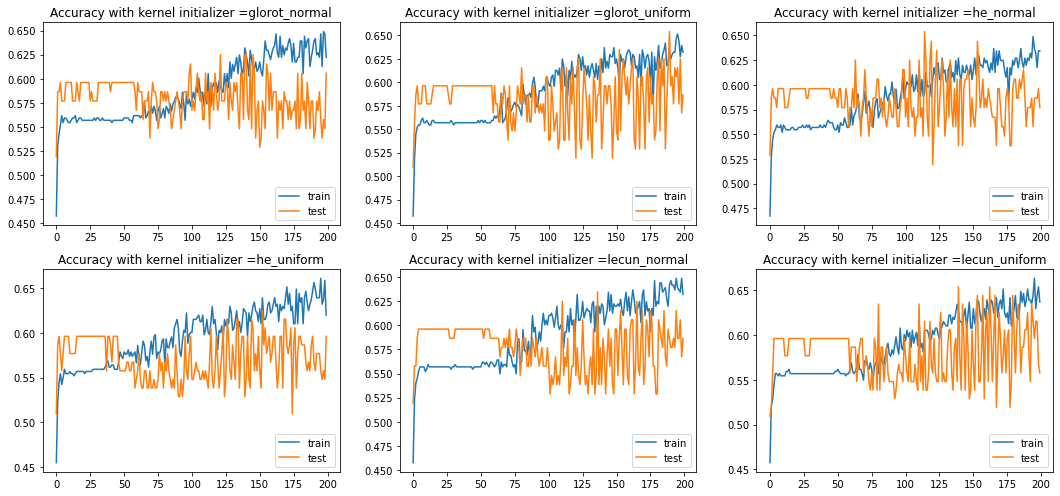

In [ ]:
# fit_model_neuron1 with epoch = 200, batch size = 256, learning rate = 0.01, activation function = relu, Adam optimizer,
# and different kernel_initializers

plt.figure(figsize=(15,7))
for i in range(len(k_init)):
    plt.subplot(2,3,i+1)
    # fit model and plot learning curves
    fit_model_neuron1_bs_lr_af_ki(X_train, y_train, X_test, y_test, k_init[i])
    plt.title('Accuracy with kernel initializer ='+ k_init[i])

plt.tight_layout()
plt.show()

**Findings:**
1. Glorot_uniform initializer seems to have a better performance when being combined with ReLU activation function, which we can see that the accuracy differences between training and testing set was not significant.

**Final Model Using Early Stopping**

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Epoch 1/200
2/2 [==============================] - 1s 152ms/step - loss: 0.6975 - accuracy: 0.4576 - val_loss: 0.6905 - val_accuracy: 0.5096
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 0.6900 - accuracy: 0.5182 - val_loss: 0.6896 - val_accuracy: 0.5577
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6910 - accuracy: 0.5448 - val_loss: 0.6891 - val_accuracy: 0.5865
Epoch 4/200
2/2 [==============================] - 0s 26ms/step - loss: 0.6895 - accuracy: 0.5521 - val_loss: 0.6878 - val_accuracy: 0.5962
Epoch 5/200
2/2 [==============================] - 0s 31ms/step - loss: 0.6908 - accuracy: 0.5545 - val_loss: 0.6872 - val_accuracy: 0.5769
Epoch 6/200
2/2 [==============================] - 0s 26ms/step - loss: 0.6890 - accuracy: 0.5545 - val_loss: 0.6862 - val_accuracy: 0.5769
Epoch 7/200
2/2 [==============================] - 0s 25ms/step - loss: 0.6886 - accuracy: 0.5593 - val_loss: 0.6854 - val_accuracy: 0.5769
Epoch 8/200
2/2 [==

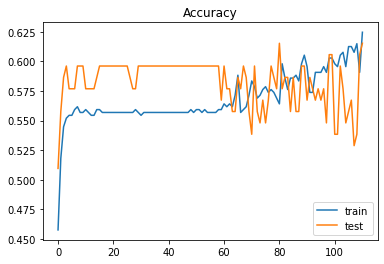

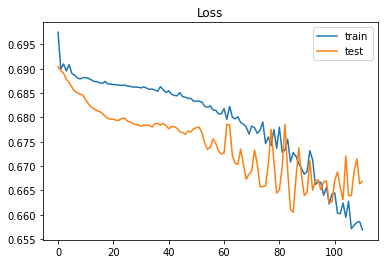

In [ ]:
# set random seed
tf.random.set_seed(42)
    
# define model
final_model = tf.keras.Sequential([
                                   tf.keras.layers.Dense(32, input_dim=27,activation='relu', kernel_initializer='glorot_uniform'),
                                   tf.keras.layers.Dense(32, activation= 'relu', kernel_initializer='glorot_uniform'),
                                   tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
                                   ])

# compile model
final_model.compile(loss=tf.keras.losses.binary_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=['accuracy'])
    
# fit model
history = final_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=200, batch_size=256, verbose=1, callbacks=[es])

# plot learning curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()

## **Evaluate Model**

In [ ]:
final_model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_242 (Dense)           (None, 32)                896       
                                                                 
 dense_243 (Dense)           (None, 32)                1056      
                                                                 
 dense_244 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# the accuracy of the model
loss, accuracy = final_model.evaluate(X_train, y_train)
print(f"Model loss on train set: {loss}")
print(f"Model accuracy on train set: {(accuracy*100):.2f}%")

loss, accuracy = final_model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

13/13 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6199
Model loss on train set: 0.6560914516448975
Model accuracy on train set: 61.99%
4/4 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.6154
Model loss on test set: 0.6668442487716675
Model accuracy on test set: 61.54%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = final_model.predict(X_test)

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[29, 22],
       [18, 35]])

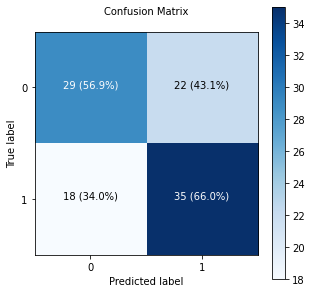

In [ ]:
import itertools

figsize = (5, 5)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.title.set_size(10)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=10)

**Conclusions:**
1. Prediction there's forest fire when actually is (True Positive) : 66%
2. Prediction there's forest fire when actually isn't (False Positive) : 43.1%
3. Prediction there is no forest fire when actually isn't (True Negative) : 56.9%
4. Prediction there is no forest fire when actually is (False Negative) : 34%

# Forest Fires Regression

## Problem Statement
Forest fires help in the natural cycle of woods' growth and replenishment. They Clear dead trees, leaves, and competing vegetation from the forest floor, so new plants can grow. Remove weak or disease-ridden trees, leaving more space and nutrients for stronger trees.

But when fires burn too hot and uncontrollable or when they’re in the “wildland-urban interface” (the places where woodlands and homes or other developed areas meet), they can be damaging and life threatning.

This project aims **to predict the burned area (area) of forest fires**, in the northeast region of Portugal. Based on the the spatial, temporal, and weather variables where the fire is spotted.

This prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation.

## Attribute Information:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20. FFMC index is the dryness of the smallest forest fuels (surface litter, leaves, needles, small twigs, etc). FFMC is a numeric rating of the moisture content of litter and other cured fine fuels.
6. DMC - DMC index from the FWI system: 1.1 to 291.3. The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter.
7. DC - DC index from the FWI system: 7.9 to 860.6. The Drought Code (DC) represents drying deep into the soil.
8. ISI - ISI index from the FWI system: 0.0 to 56.10. The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread.
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

## **Data Preparation**

In [ ]:
# sort the highest correlated features to the target variable
feature_corr = abs(clf.corr()['area']).sort_values(ascending=False)
feature_corr

area                 1.000000
forest_fire          0.193224
temp                 0.097844
RH                   0.075519
DMC                  0.072994
x_axis_coordinate    0.063385
DC                   0.049383
y_axis_coordinate    0.044873
FFMC                 0.040122
wind                 0.012317
ISI                  0.008258
rain                 0.007366
Name: area, dtype: float64

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

# Create column transformer (this will help to normalize/preprocess data)
ct = make_column_transformer(
    (MinMaxScaler(), ['x_axis_coordinate', 'y_axis_coordinate', 'FFMC', 'DMC', 'DC', 'ISI','temp', 'RH', 'wind', 'rain']), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ['day','month'])
    )

# Create X & y
X = clf.drop(['forest_fire','area'], axis=1)
y = clf['area']

# Build  train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

print ('Train set:  ', X_train_normal.shape,  y_train.shape)
print ('Test set:   ', X_test_normal.shape,  y_test.shape)

Train set:   (413, 29) (413,)
Test set:    (104, 29) (104,)


In [ ]:
X_train_normal[0]

array([0.375     , 0.14285714, 0.9483871 , 0.34872502, 0.87205348,
       0.37004405, 0.68488746, 0.14117647, 0.36470588, 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        ])

## **Modeling**

**Model 1 : Layer Experiment**

In [ ]:
def fit_rmodel_layer1(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=epoch, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot() # plt.plot(history.history['loss'], label='train')
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
def fit_rmodel_layer2(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=epoch, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
def fit_rmodel_layer3(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=epoch, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
def fit_rmodel_layer4(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=epoch, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

4/4 [==============================] - 0s 3ms/step - loss: 19.6229 - mae: 19.6229


<Figure size 360x216 with 0 Axes>

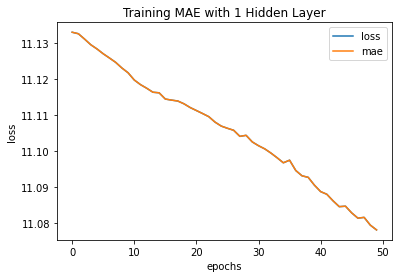

4/4 [==============================] - 0s 3ms/step - loss: 19.6074 - mae: 19.6074


<Figure size 360x216 with 0 Axes>

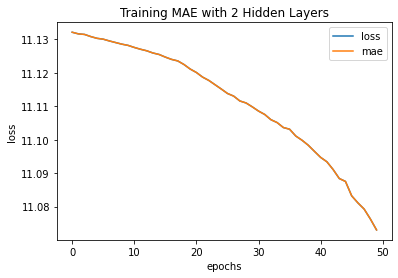

4/4 [==============================] - 0s 4ms/step - loss: 19.6042 - mae: 19.6042


<Figure size 360x216 with 0 Axes>

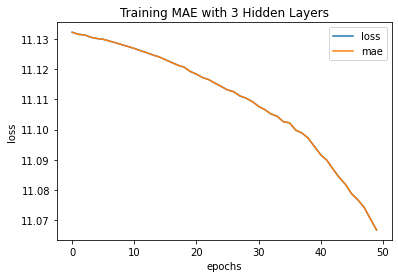

4/4 [==============================] - 0s 4ms/step - loss: 19.6342 - mae: 19.6342


<Figure size 360x216 with 0 Axes>

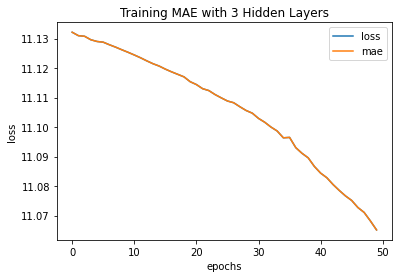

In [ ]:
## fit_rmodel_layer1
plt.figure(figsize=(5,3))
fit_rmodel_layer1(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 1 Hidden Layer')
plt.show()

## fit_rmodel_layer2
plt.figure(figsize=(5,3))
fit_rmodel_layer2(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 2 Hidden Layers')
plt.show()

## fit_rmodel_layer3
plt.figure(figsize=(5,3))
fit_rmodel_layer3(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 3 Hidden Layers')
plt.show()

## fit_rmodel_layer4
plt.figure(figsize=(5,3))
fit_rmodel_layer4(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 4 Hidden Layers')
plt.show()

**Findings:**
1. Adding more layers with the same number of neurons (3) at first will reduce error/loss. It can be seen from MAE which is getting smaller both training and testing.
2. But then at some point, in this case adding layers up to 4 results higher error value in testing set than previous experiment, while error value in training set lower. It indicates that the model is overfitting.
3. The optimum number of layer is 3.

**Model 2 : Neuron Experiment**

In [ ]:
def fit_rmodel_layer3_neuron1(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=epoch, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
def fit_rmodel_layer3_neuron2(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=epoch, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs")
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
def fit_rmodel_layer3_neuron3(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=epoch, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

4/4 [==============================] - 0s 3ms/step - loss: 19.6042 - mae: 19.6042


<Figure size 360x216 with 0 Axes>

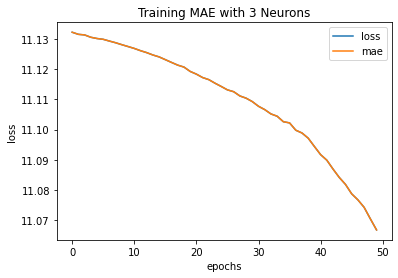

4/4 [==============================] - 0s 3ms/step - loss: 19.6321 - mae: 19.6321


<Figure size 360x216 with 0 Axes>

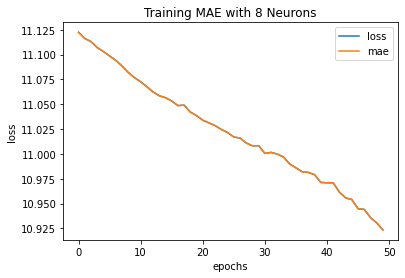

4/4 [==============================] - 0s 4ms/step - loss: 19.7327 - mae: 19.7327


<Figure size 360x216 with 0 Axes>

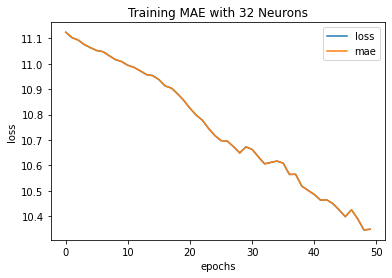

4/4 [==============================] - 0s 4ms/step - loss: 19.8132 - mae: 19.8132


<Figure size 360x216 with 0 Axes>

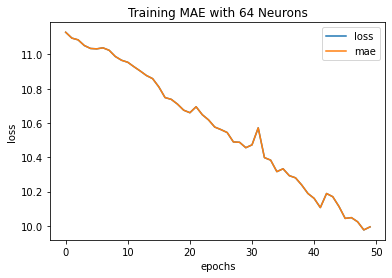

In [ ]:
## fit_rmodel_layer3
plt.figure(figsize=(5,3))
fit_rmodel_layer3(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 3 Neurons')
plt.show()

## fit_rmodel_layer3_neuron1
plt.figure(figsize=(5,3))
fit_rmodel_layer3_neuron1(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 8 Neurons')
plt.show()

## fit_rmodel_layer3_neuron2
plt.figure(figsize=(5,3))
fit_rmodel_layer3_neuron2(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 32 Neurons')
plt.show()

## fit_rmodel_layer3_neuron3
plt.figure(figsize=(5,3))
fit_rmodel_layer3_neuron3(X_train_normal, y_train, X_test_normal, y_test, epoch = 50)
plt.title('Training MAE with 64 Neurons')
plt.show()

**Findings:**
1. Adding more neurons in the same number of layer cause overfitting.

**Model 3 : Epoch Experiment**

In [ ]:
epochz = [50, 100, 150, 200, 250, 300]

4/4 [==============================] - 0s 4ms/step - loss: 19.6385 - mae: 19.6385


<Figure size 360x1512 with 0 Axes>

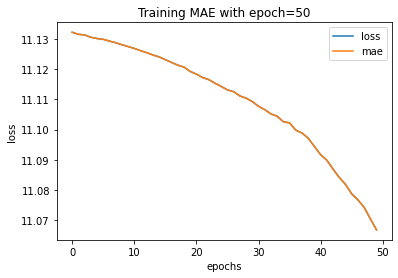

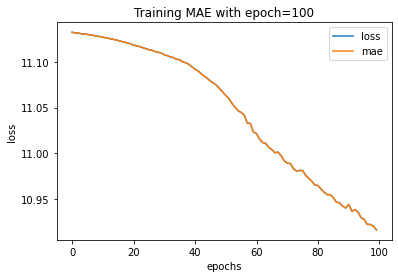

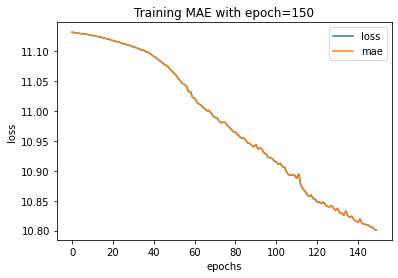

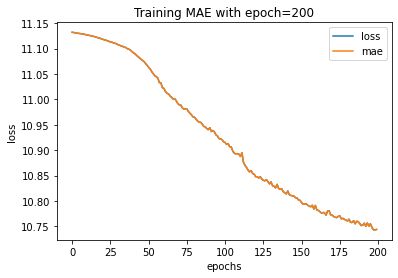

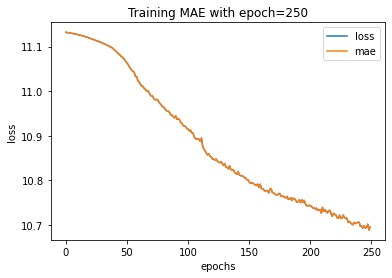

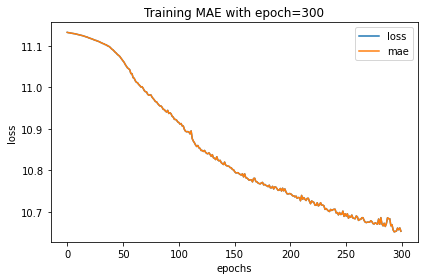

In [ ]:
# with fit_rmodel_layer3 with different epoch

plt.figure(figsize=(5,21))
for i in range(len(epochz)):
    # fit model and plot learning curves
    fit_rmodel_layer3(X_train_normal, y_train, X_test_normal, y_test, epochz[i])
    plt.title('Training MAE with epoch='+str(epochz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. Adding more epoch up to 150 results better model performance. 

**Model 4 : Batch Size Experiment**

In [ ]:
def fit_rmodel_layer3_bs(x_train, y_train, x_test, y_test, batch_size):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=150, batch_size=batch_size, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
batchz = [16, 32, 64, 128, 256, 512]

4/4 [==============================] - 0s 3ms/step - loss: 19.6142 - mae: 19.6142


<Figure size 360x1512 with 0 Axes>

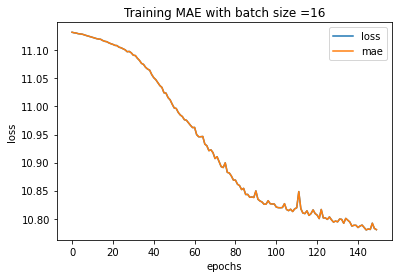

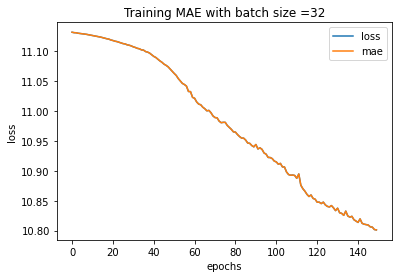

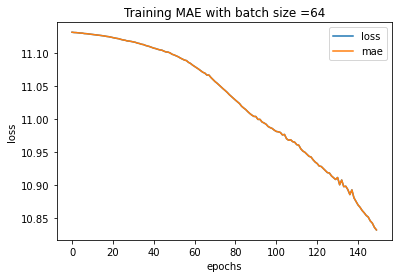

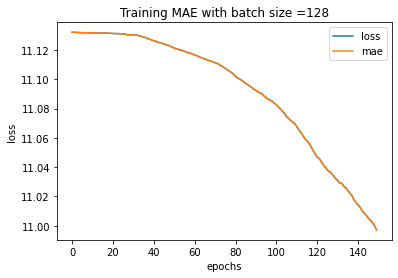

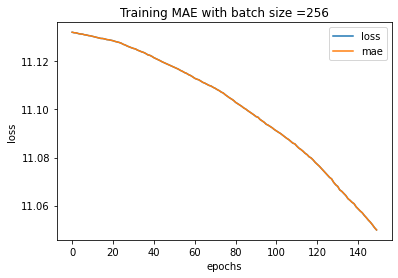

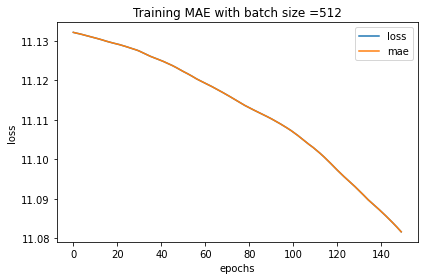

In [ ]:
# with fit_rmodel_layer3, epoch = 150, and with different batch size

plt.figure(figsize=(5,21))
for i in range(len(batchz)):
    # fit model and plot learning curves
    fit_rmodel_layer3_bs(X_train_normal, y_train, X_test_normal, y_test, batchz[i])
    plt.title('Training MAE with batch size ='+str(batchz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. Enlarge batch size will make model performance better and accelerate the learning process. Batch size defines the number of samples we use in one epoch to train a neural network.
2. However too large batch will make model performance getting worse. The optimum batch size in this case is 32.

**Model 5 : Learning Rate Experiment**

In [ ]:
def fit_rmodel_layer3_bs_lr(x_train, y_train, x_test, y_test, lr):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=150, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
learning_rt = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6]

4/4 [==============================] - 0s 4ms/step - loss: 19.6569 - mae: 19.6569


<Figure size 360x1512 with 0 Axes>

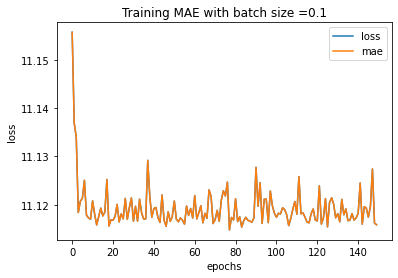

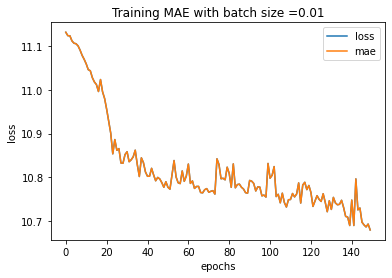

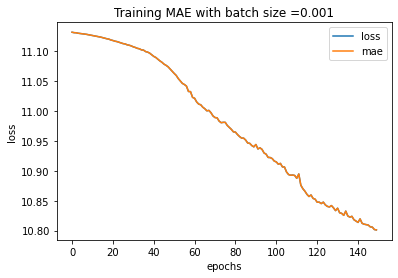

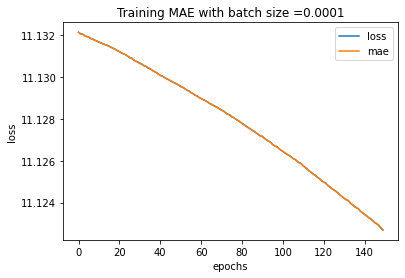

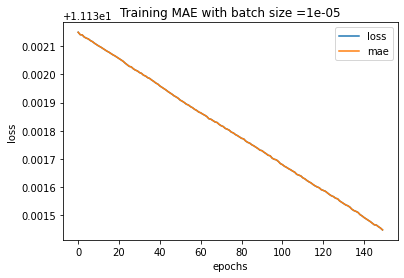

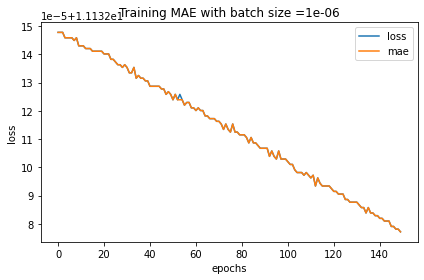

In [ ]:
# with fit_rmodel_layer3, epoch = 150, batch size = 32, and with different learning rate

plt.figure(figsize=(5,21))
for i in range(len(learning_rt)):
    # fit model and plot learning curves
    fit_rmodel_layer3_bs_lr(X_train_normal, y_train, X_test_normal, y_test, learning_rt[i])
    plt.title('Training MAE with learning rate ='+str(learning_rt[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. The bigger learning rate, loss curves become volatile because the gradient descent might start to diverge, and it’ll never reach the optimal solution.
2. The smaller learning rate, the model becomes overfiiting.

**Model 6 : Activation Function Experiment**

In [ ]:
def fit_rmodel_layer3_bs_lr_af(x_train, y_train, x_test, y_test, activation):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation=activation),
        tf.keras.layers.Dense(3, activation=activation),
        tf.keras.layers.Dense(3, activation=activation),
        tf.keras.layers.Dense(3, activation=activation),
        tf.keras.layers.Dense(1, activation=activation)
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=150, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
activationz = ['relu','tanh','linear','elu', 'selu']

4/4 [==============================] - 0s 3ms/step - loss: 19.7279 - mae: 19.7279


<Figure size 360x1512 with 0 Axes>

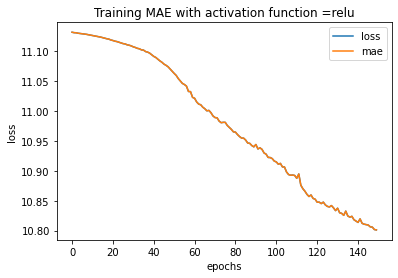

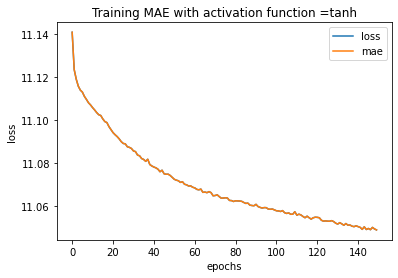

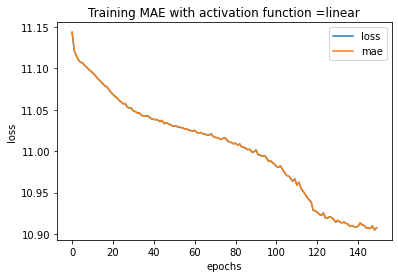

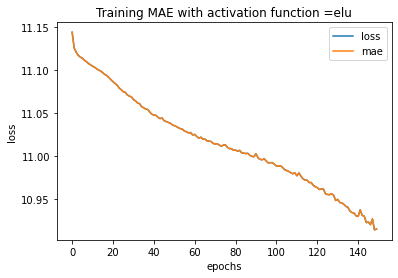

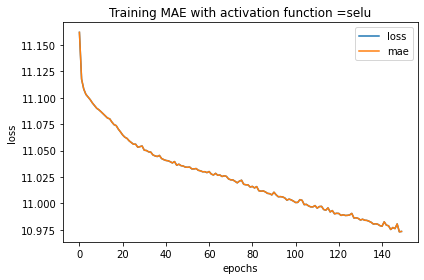

In [ ]:
# with fit_rmodel_layer3, epoch = 150, batch size = 32, learning rate = 0.001 and with different activation functions

plt.figure(figsize=(5,21))
for i in range(len(activationz)):
    # fit model and plot learning curves
    fit_rmodel_layer3_bs_lr_af(X_train_normal, y_train, X_test_normal, y_test, activationz[i])
    plt.title('Training MAE with activation function ='+ activationz[i])

plt.tight_layout()
plt.show()

**Findings:**
1. The activation function **relu** give the optimum model performance.

**Model 7 : Optimization Function Experiment**

In [ ]:
def fit_rmodel_layer3_bs_lr_af_o(x_train, y_train, x_test, y_test, optimizer):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=optimizer(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=150, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
optimizerz =[tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.Adamax]

4/4 [==============================] - 0s 3ms/step - loss: 19.6323 - mae: 19.6323


<Figure size 360x1512 with 0 Axes>

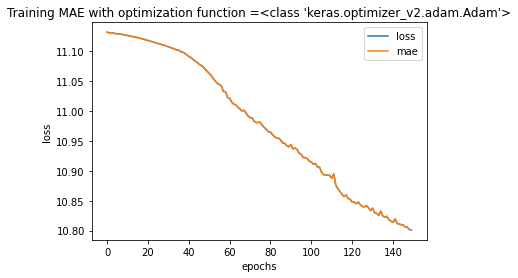

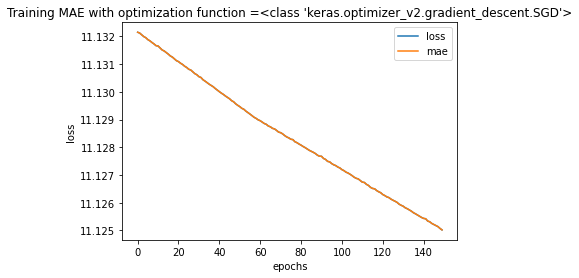

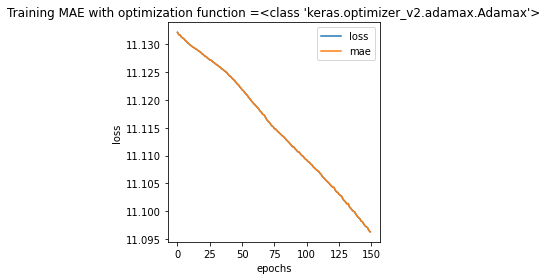

In [ ]:
# with fit_rmodel_layer3, epoch = 150, batch size = 32, learning rate = 0.001,
# activation functions relu and with different optimization functions

plt.figure(figsize=(5,21))
for i in range(len(optimizerz)):
    # fit model and plot learning curves
    fit_rmodel_layer3_bs_lr_af_o(X_train_normal, y_train, X_test_normal, y_test, optimizerz[i])
    plt.title('Training MAE with optimization function ='+ str(optimizerz[i]))

plt.tight_layout()
plt.show()

**Findings:**
1. The optimization function **Adam** give the optimum model performance.

**Model 8 Kernel Initializer Experiment**

In [ ]:
def fit_rmodel_layer3_bs_lr_af_o_ki(x_train, y_train, x_test, y_test, initializers):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=29,activation='relu', kernel_initializer=initializers),
        tf.keras.layers.Dense(3, activation='relu', kernel_initializer=initializers),
        tf.keras.layers.Dense(3, activation='relu', kernel_initializer=initializers),
        tf.keras.layers.Dense(3, activation='relu', kernel_initializer=initializers),
        tf.keras.layers.Dense(1, activation='relu', kernel_initializer=initializers)
    ])

    # compile model
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
    
    # fit model
    history = model.fit(x_train, y_train, 
                          epochs=150, batch_size=32, verbose=0)
    
    model.evaluate(x_test, y_test)

    # Plot history (also known as a loss curve)
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");
    # plot learning curves
    plt.legend(loc='upper right')

In [ ]:
k_init = ['glorot_normal','glorot_uniform','he_normal','he_uniform','lecun_normal','lecun_uniform']

4/4 [==============================] - 0s 4ms/step - loss: 19.4722 - mae: 19.4722


<Figure size 360x1512 with 0 Axes>

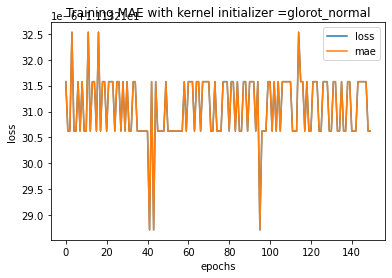

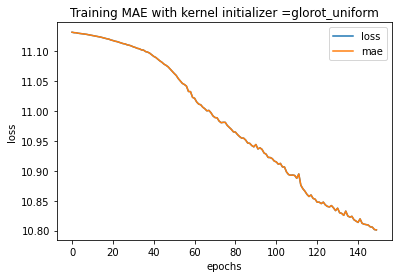

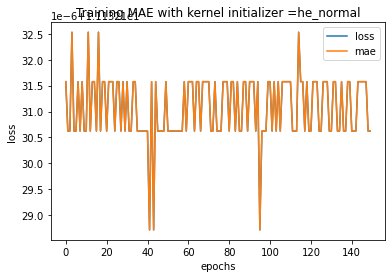

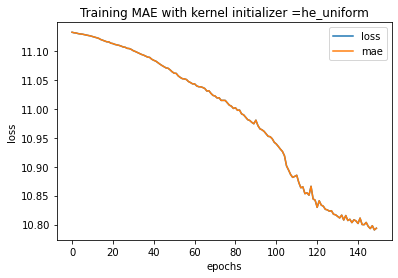

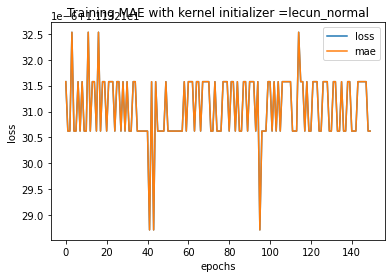

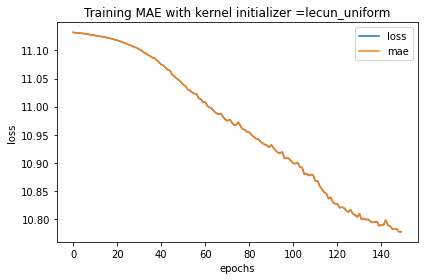

In [ ]:
# with fit_rmodel_layer3, epoch = 150, batch size = 32, learning rate = 0.001,
# activation functions relu, optimization functions = Adam, and with different kernel_initializers

plt.figure(figsize=(5,21))
for i in range(len(k_init)):
    # fit model and plot learning curves
    fit_rmodel_layer3_bs_lr_af_o_ki(X_train_normal, y_train, X_test_normal, y_test, k_init[i])
    plt.title('Training MAE with kernel initializer ='+ k_init[i])

plt.tight_layout()
plt.show()

**Findings:**
1. Glorot_uniform initializer seems to have a better performance when being combined with ReLU activation function, which we can see that the accuracy differences between training and testing set was not significant.

**Final Model Using Early Stopping**

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)

Epoch 1/150
13/13 [==============================] - 1s 4ms/step - loss: 11.1322 - mae: 11.1322
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 11.1315 - mae: 11.1315
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 11.1313 - mae: 11.1313
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 11.1305 - mae: 11.1305
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 11.1301 - mae: 11.1301
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 11.1298 - mae: 11.1298
Epoch 7/150
13/13 [==============================] - 0s 3ms/step - loss: 11.1292 - mae: 11.1292
Epoch 8/150
13/13 [==============================] - 0s 3ms/step - loss: 11.1287 - mae: 11.1287
Epoch 9/150
13/13 [==============================] - 0s 3ms/step - loss: 11.1280 - mae: 11.1280
Epoch 10/150
13/13 [==============================] - 0s 3ms/step - loss: 11.1274 - mae: 11.1274
Epoch 11/150
13/13 [===================

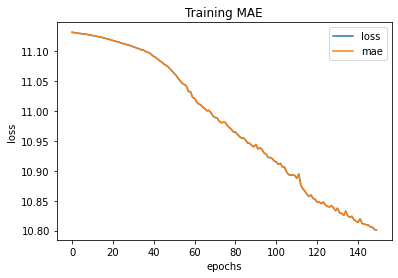

In [ ]:
# set random seed
tf.random.set_seed(42)
    
# define model
final_rmodel = tf.keras.Sequential([
                                    tf.keras.layers.Dense(3, input_dim=29,activation='relu', kernel_initializer='glorot_uniform'),
                                    tf.keras.layers.Dense(3, activation='relu', kernel_initializer='glorot_uniform'),
                                    tf.keras.layers.Dense(3, activation='relu', kernel_initializer='glorot_uniform'),
                                    tf.keras.layers.Dense(3, activation='relu', kernel_initializer='glorot_uniform'),
                                    tf.keras.layers.Dense(1, activation='relu', kernel_initializer='glorot_uniform')
                                   ])

# compile model
final_rmodel.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['mae'])
    
# fit model
history = final_rmodel.fit(X_train_normal, y_train, 
                    epochs=150, batch_size=32, verbose=1, callbacks=[es])

print('\nLoss Testing Set')
final_rmodel.evaluate(X_test_normal, y_test)

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title('Training MAE')
# plot learning curves
plt.legend(loc='upper right')

## **Evaluate Model**

In [ ]:
final_rmodel.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_388 (Dense)           (None, 3)                 90        
                                                                 
 dense_389 (Dense)           (None, 3)                 12        
                                                                 
 dense_390 (Dense)           (None, 3)                 12        
                                                                 
 dense_391 (Dense)           (None, 3)                 12        
                                                                 
 dense_392 (Dense)           (None, 1)                 4         
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


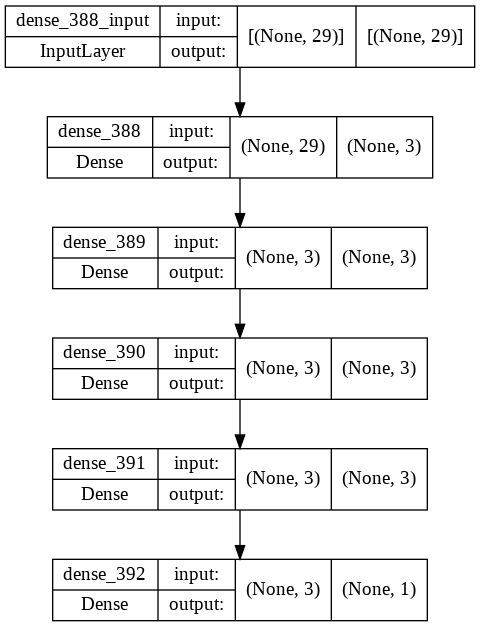

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(final_rmodel, show_shapes=True)

In [ ]:
# Make predictions
y_preds = final_rmodel.predict(X_test_normal)

In [ ]:
# View the predictions
y_preds.squeeze()

array([0.0000000e+00, 0.0000000e+00, 3.2974398e-01, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.7038975e+00, 0.0000000e+00, 3.8480785e-01, 7.5830191e-01,
       0.0000000e+00, 0.0000000e+00, 6.9180214e-01, 2.0655301e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 8.6306486e+00, 1.5096357e+00,
       0.0000000e+00, 5.7143933e-01, 2.8140314e+00, 4.2378718e-01,
       1.1716069e+00, 1.0777524e+00, 3.0096667e-03, 1.0965449e+00,
       1.6264274e+00, 5.7519978e-01, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.9929656e+00, 9.1895479e-01, 0.0000000e+00,
       3.8539055e-01, 1.6520059e-01, 0.0000000e+00, 0.0000000e+00,
       1.5116311e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.6175359e-01, 5.0504053e-01, 0.0000000e+00, 9.5353556e-01,
       9.7349918e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.4192638e+00, 1.4331964e

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((104,), (104, 1))

In [ ]:
# Calculate mean absolute error between y_test and y_preds

mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=19.46165>

**Note**

1. Consequently, if the learning rate is too low, gradient descent will take more time to reach the optima. Conversely, if the learning rate is too big, the gradient descent might start to diverge, and it’ll never reach the optimal solution.

2. Batch size defines the number of samples we use in one epoch to train a neural network. If we increase the batch size and our accuracy increases, there’s no sense to modify the learning rate to achieve the prior results.

3. If the neural network trains too slow, we might increase the batch size and monitor the results’ changes. Also, we might improve the learning rate if the network converges too slow.